In [1]:
import numpy as np
from glob import glob
import pickle
import matplotlib.pyplot as plt
import sys,os

from numpy.lib.npyio import save

sys.path.append('..')
from genome import Genome
from visualizations import save_movie
import constants

In [2]:
# # square additional objective
# data_dict = {0 : {'dir':'exp1_ksweep/error', 'label': 'bi-loss', 'color': 'lightblue', 'gens':2000},
#              1 : {'dir':'exp1_ksweep/error_phase1_error_phase2', 'label': 'tri-loss', 'color': 'darkblue', 'gens':2000},
#              2 : {'dir':'exp1_ksweep/k1/error_MI', 'label': 'tri-loss-empowerment', 'color': 'darkgreen', 'gens':2000},
#              3 : {'dir':'exp5_addcontrols_square/min_action_entropy', 'label': 'tri-loss-min. action entropy (local)', 'color': 'rebeccapurple', 'gens':2000},
#              4 : {'dir':'exp5_addcontrols_square/max_action_entropy', 'label': 'tri-loss-max. action entropy (local)', 'color': 'orangered', 'gens':2000},
#              5 : {'dir':'exp5_addcontrols_square/min_global_action_entropy', 'label': 'tri-loss-min. action entropy (global)', 'color': 'mediumpurple', 'gens':1000},
#              6 : {'dir':'exp5_addcontrols_square/square/error_max_global_action_entropy', 'label': 'tri-loss-max. action entropy (global)', 'color': 'lightsalmon', 'gens':1500}}
# title = ''
# save_dir = None

In [6]:
# X additional objective
data_dict = {0 : {'dir':'exp6_addcontrols_x/error', 'label': 'bi-loss', 'color': 'lightblue', 'gens':2000},
             1 : {'dir':'exp6_addcontrols_x/error_phase1_error_phase2', 'label': 'tri-loss', 'color': 'darkblue', 'gens':2000},
             2 : {'dir':'exp6_addcontrols_x/error_MI', 'label': 'tri-loss-empowerment', 'color': 'darkgreen', 'gens':2000},
             3 : {'dir':'exp6_addcontrols_x/error_min_action_entropy', 'label': 'tri-loss-min. action entropy (local)', 'color': 'rebeccapurple', 'gens':2000}}
            #  4 : {'dir':'exp6_addcontrols_x/min_action_entropy', 'label': 'bi-min. action entropy', 'color': 'sienna', 'gens':2000},
            #  5 : {'dir':'exp6_addcontrols_x/MI', 'label': 'bi-empowerment', 'color': 'magenta', 'gens':2000}}
title = ''
save_dir = None

0 35
../data/exp6_addcontrols_x/error/*.p
1 35
../data/exp6_addcontrols_x/error_phase1_error_phase2/*.p
2 34
../data/exp6_addcontrols_x/error_MI/*.p
3 35
../data/exp6_addcontrols_x/error_min_action_entropy/*.p


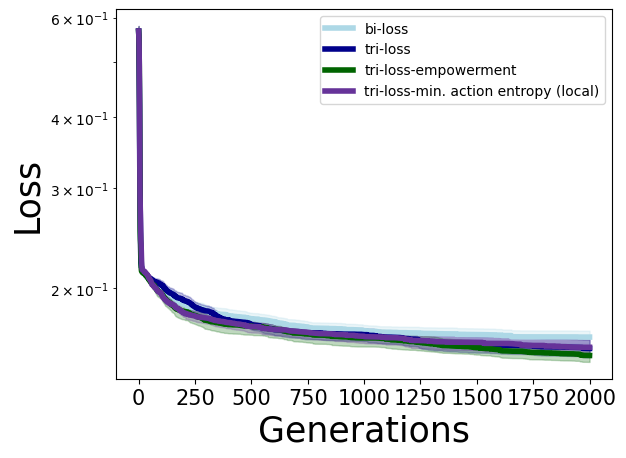

In [8]:
line_handles=[]
labels = []

for line in data_dict:
    
    # Load data

    filenames = glob('../data/'+data_dict[line]['dir']+'/*.p')

    print(line, len(filenames))
    print('../data/'+data_dict[line]['dir']+'/*.p')

    all_fits = np.zeros(shape=(len(filenames), data_dict[line]['gens']+1))

    for i,fn in enumerate(filenames):

        try:
            with open(fn, 'rb') as f:
                best, stats = pickle.load(f)
            fits_per_gen = stats[0]
            
        except:
            with open(fn, 'rb') as f:
                stuff = pickle.load(f)
            fits_per_gen = stuff[0]


        all_fits[i,:]=fits_per_gen

    avg_fits = np.mean(all_fits, axis=0)
    # 95% confidence intervals
    ci = 1.96 * (np.std(all_fits, axis=0)/np.sqrt(len(all_fits)))

    x = np.arange(len(avg_fits))
    # line, = plt.plot(avg_fits, color=constants.color_treatment_dict[tx], linewidth=4)
    line_handle, = plt.semilogy(avg_fits, color=data_dict[line]['color'], linewidth=4)
    # line, = plt.plot(avg_fits, color=color_tx_dict[tx], linewidth=4)
    plt.fill_between(x, (avg_fits-ci), (avg_fits+ci), color=data_dict[line]['color'], alpha=.25)

    line_handles.append(line_handle)
    labels.append(data_dict[line]['label'])

plt.legend(line_handles, labels, fontsize=10)
plt.xlabel('Generations', fontsize=25)
plt.ylabel('Loss', fontsize=25)
plt.title(title, fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

if save_dir is not None:
    plt.savefig(save_dir+'/fitness_curves.png', dpi=300, bbox_inches='tight')